In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

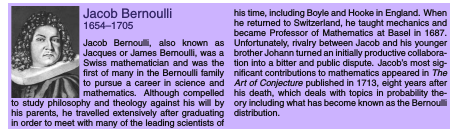

## Chapter 1: Probability Theory and Pattern Recognition

In Chapter 1, we emphasized the central role played by probability theory in the solution of pattern recognition problems. We now turn to an exploration of some specific examples of probability distributions and their properties. These distributions are of interest on their own, can serve as building blocks for more complex models, and will be used extensively throughout the book.

The distributions introduced in this chapter will also serve another purpose: they provide an opportunity to discuss key statistical concepts, such as Bayesian inference, in the context of simple models before we encounter them in more complex situations in later chapters.

One role of the distributions discussed in this chapter is to model the probability distribution $ p(x) $ of a random variable $ x $, given a finite set $ x_1, \ldots, x_N $ of observations. This problem is known as *density estimation*. For the purposes of this chapter, we shall assume that the data points are independent and identically distributed (i.i.d.).

It should be emphasized that the problem of density estimation is fundamentally ill-posed, because there are infinitely many probability distributions that could have given rise to the observed finite data set. Indeed, any distribution $ p(x) $ that is nonzero at each of the data points $ x_1, \ldots, x_N $ is a potential candidate. The issue of choosing an appropriate distribution relates to the problem of *model selection*, encountered in polynomial curve fitting in Chapter 1 and central to pattern recognition.

We begin by considering the binomial and multinomial distributions for discrete random variables, and the Gaussian distribution for continuous random variables. These are examples of *parametric distributions*, so-called because they are governed by a small number of adaptive parameters, such as the mean and variance in the Gaussian case.

To apply such models to density estimation, we need a procedure for determining suitable parameter values, given an observed data set. In a frequentist approach, we select specific parameter values by optimizing a criterion, such as the likelihood function. In a Bayesian approach, we introduce prior distributions over the parameters and then use Bayes’ theorem to compute the posterior distribution given the observed data.

An important role is played by *conjugate priors*, which lead to posterior distributions with the same functional form as the prior, greatly simplifying Bayesian analysis. For example:
- The conjugate prior for the parameters of the multinomial distribution is the *Dirichlet distribution*.
- The conjugate prior for the mean of a Gaussian is another Gaussian.

All of these distributions are part of the *exponential family* of distributions, which possess important properties discussed in this chapter.

One limitation of the parametric approach is that it assumes a specific functional form for the distribution, which may be inappropriate for some applications. An alternative approach is provided by *nonparametric density estimation methods*, where the distribution’s form depends on the data set size. These models still contain parameters, but they control model complexity rather than the distribution's form. We conclude this chapter by discussing three nonparametric methods based on histograms, nearest-neighbors, and kernels.

## 1. Binary Variables

We begin by considering a single binary random variable $ x \in \{0, 1\} $. For example, $ x $ might represent the outcome of flipping a coin, where $ x = 1 $ represents ‘heads’ and $ x = 0 $ represents ‘tails’. We can imagine a biased coin, so that the probability of landing heads is not necessarily the same as landing tails. Let:
- The probability of $ x = 1 $ be denoted by the parameter $ \mu $, so that
  $$
  p(x = 1|\mu) = \mu \quad \text{where} \quad 0 \leq \mu \leq 1,
  $$
- It follows that
  $$
  p(x = 0|\mu) = 1 - \mu.
  $$

The probability distribution over $ x $ can be written in the form:
$$
\text{Bern}(x|\mu) = \mu^x (1 - \mu)^{1 - x},
$$
which is known as the *Bernoulli distribution*. This distribution is normalized, and it has mean and variance given by:
$$
E[x] = \mu,
$$
$$
\text{Var}[x] = \mu (1 - \mu).
$$

Now suppose we have a data set $ D = \{x_1, \ldots, x_N\} $ of observed values of $ x $. We can construct the *likelihood function*, which is a function of $ \mu $, assuming the observations are drawn independently from $ p(x|\mu) $:
$$
p(D|\mu) = \prod_{n=1}^N p(x_n|\mu) = \prod_{n=1}^N \mu^{x_n} (1 - \mu)^{1 - x_n}.
$$

In a frequentist setting, we can estimate a value for $ \mu $ by maximizing the likelihood function, or equivalently, by maximizing the logarithm of the likelihood. For the Bernoulli distribution, the log likelihood function is:
$$
\ln p(D|\mu) = \sum_{n=1}^N \ln p(x_n|\mu) = \sum_{n=1}^N \left( x_n \ln \mu + (1 - x_n) \ln (1 - \mu) \right).
$$

It is worth noting that the log likelihood function depends on the $ N $ observations $ x_n $ only through their sum $ \sum_n x_n $. This sum is a *sufficient statistic* for the data under this distribution, a concept we will explore in detail.

To find the maximum likelihood estimator $ \mu_{\text{ML}} $, we set the derivative of $ \ln p(D|\mu) $ with respect to $ \mu $ to zero:
$$
\mu_{\text{ML}} = \frac{1}{N} \sum_{n=1}^N x_n.
$$

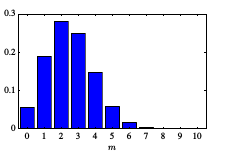

Fig.1 Histogram plot of the binomial distribution (2.9) as a function of m for N = 10 and µ = 0.25.

## Binomial Distribution and Sample Mean

The *sample mean* is also known as the maximum likelihood estimator. If we denote the number of observations of $ x = 1 $ (heads) within this data set by $ m $, we can write Equation (2.7) as:
$$
\mu_{\text{ML}} = \frac{m}{N}
$$
where $ \mu_{\text{ML}} $ represents the probability of landing heads in the maximum likelihood framework, given by the fraction of observations of heads in the data set.

For example, suppose we flip a coin three times and observe three heads. Here, $ N = m = 3 $, and
$$
\mu_{\text{ML}} = 1.
$$
In this case, the maximum likelihood estimate would predict that all future observations should yield heads, which is unrealistic. This is an example of *overfitting* associated with maximum likelihood. We will soon discuss how to arrive at more reasonable conclusions by introducing a prior distribution over $ \mu $.

We can also determine the distribution of the number $ m $ of observations where $ x = 1 $, given a data set of size $ N $. This is known as the *binomial distribution*, and from Equation (2.5), we see that it is proportional to:
$$
\mu^m (1 - \mu)^{N - m}.
$$
To normalize this, we must account for all possible ways of obtaining $ m $ heads out of $ N $ coin flips. Thus, the binomial distribution can be written as:
$$
\text{Bin}(m|N, \mu) = \binom{N}{m} \mu^m (1 - \mu)^{N - m}
$$
where
$$
\binom{N}{m} = \frac{N!}{(N - m)! m!}
$$
is the number of ways to choose $ m $ objects from a total of $ N $ identical objects.

For example, Fig.1 shows a plot of the binomial distribution for $ N = 10 $ and $\mu = 0.25 $.

### Mean and Variance of the Binomial Distribution

The mean and variance of the binomial distribution can be derived from the result of Exercise 1.10, which shows that for independent events, the mean of the sum is the sum of the means, and the variance of the sum is the sum of the variances.

Since $ m = x_1 + \dots + x_N $, and each observation has mean and variance:
$$
E[m] = \sum_{m=0}^N m \, \text{Bin}(m|N, \mu) = N \mu,
$$
$$
\text{Var}[m] = \sum_{m=0}^N (m - E[m])^2 \, \text{Bin}(m|N, \mu) = N \mu (1 - \mu).
$$

These results can also be derived directly using calculus.


Mean (E[m]): 2.5
Variance (Var[m]): 1.875


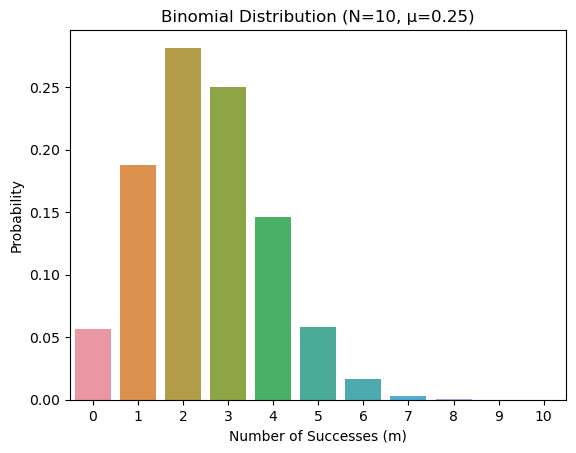

In [1]:
# Import Seaborn for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate binomial coefficient (N choose m)
def binomial_coefficient(N, m):
    # Calculate N! / (m! * (N - m)!)
    numerator = 1
    for i in range(1, N + 1):
        numerator *= i
    denominator_m = 1
    for i in range(1, m + 1):
        denominator_m *= i
    denominator_N_m = 1
    for i in range(1, N - m + 1):
        denominator_N_m *= i
    return numerator // (denominator_m * denominator_N_m)

# Function to compute binomial distribution
def binomial_distribution(N, mu):
    # Calculate probabilities for m = 0 to N
    probabilities = []
    for m in range(N + 1):
        prob = binomial_coefficient(N, m) * (mu ** m) * ((1 - mu) ** (N - m))
        probabilities.append(prob)
    return probabilities

# Function to calculate mean and variance of the binomial distribution
def binomial_mean_variance(N, mu):
    # Mean and variance formulas for binomial distribution
    mean = N * mu
    variance = N * mu * (1 - mu)
    return mean, variance

# Parameters for the binomial distribution
N = 10   # Number of trials
mu = 0.25  # Probability of success (e.g., probability of heads)

# Calculate binomial distribution
probabilities = binomial_distribution(N, mu)

# Calculate mean and variance
mean, variance = binomial_mean_variance(N, mu)

# Print mean and variance
print(f"Mean (E[m]): {mean}")
print(f"Variance (Var[m]): {variance}")

# Plot the binomial distribution
sns.barplot(x=list(range(N + 1)), y=probabilities)
plt.xlabel("Number of Successes (m)")
plt.ylabel("Probability")
plt.title(f"Binomial Distribution (N={N}, µ={mu})")
plt.show()


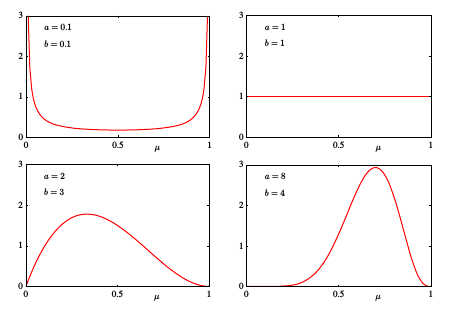

Fig.2 Plots of the beta distribution Beta(µ|a, b) given by (2.13) as a function of µ for various values of the hyperparameters a and b.

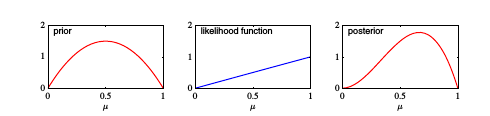

Fig.3 Illustration of one step of sequential Bayesian inference. The prior is given by a beta distribution with parameters a = 2, b = 2, and the likelihood function, given by (2.9) with N = m = 1, corresponds to a single observation of x = 1, so that the posterior is given by a beta distribution with parameters a = 3, b = 2.

## 1. The Beta Distribution

We have previously seen that the maximum likelihood estimate for the parameter $\mu$ in the Bernoulli distribution (and hence in the binomial distribution) is given by the fraction of observations in the dataset where $x = 1$. However, for small datasets, this method can lead to overfitting.

### Introducing a Prior Distribution $p(\mu)$

To address this, we apply a Bayesian approach by introducing a prior distribution $p(\mu)$ over the parameter $\mu$. We seek a prior distribution that not only is analytically convenient but also interpretable. Given the likelihood function as a product of terms of the form $\mu^x (1 - \mu)^{1 - x}$, choosing a prior proportional to powers of $\mu$ and $(1 - \mu)$ results in a posterior distribution with the same functional form as the prior, known as *conjugacy*.

### Beta Distribution Prior

We choose the **Beta distribution** as the prior:

$$
\text{Beta}(\mu | a, b) = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \mu^{a - 1} (1 - \mu)^{b - 1}
$$

where $\Gamma(x)$ is the gamma function, and the coefficient ensures that the Beta distribution is normalized:

$$
\int_0^1 \text{Beta}(\mu | a, b) \, d\mu = 1
$$

The **mean** and **variance** of the Beta distribution are:

$$
\mathbb{E}[\mu] = \frac{a}{a + b}
$$

$$
\text{Var}[\mu] = \frac{ab}{(a + b)^2 (a + b + 1)}
$$

Here, $a$ and $b$ (often called hyperparameters) control the distribution of $\mu$.

### Posterior Distribution

The posterior distribution of $\mu$, combining the Beta prior and the binomial likelihood, takes the form:

$$
p(\mu | m, l, a, b) \propto \mu^{m + a - 1} (1 - \mu)^{l + b - 1}
$$

where $l = N - m$, the number of 'tails' in the dataset. This posterior distribution is itself a Beta distribution:

$$
p(\mu | m, l, a, b) = \frac{\Gamma(m + a + l + b)}{\Gamma(m + a)\Gamma(l + b)} \mu^{m + a - 1} (1 - \mu)^{l + b - 1}
$$

Thus, observing $m$ counts of $x = 1$ and $l$ counts of $x = 0$ updates the parameters of the Beta distribution to $a + m$ and $b + l$.

### Interpretation of the Posterior Mean and Variance

As we observe more data, the posterior mean of $\mu$ lies between the prior mean and the maximum likelihood estimate for $\mu$. The posterior distribution becomes more sharply peaked as the amount of data increases, which is also evident in the variance formula:

$$
\text{Var}[\mu] = \frac{ab}{(a + b)^2 (a + b + 1)}
$$

which approaches zero as $a \rightarrow \infty$ or $b \rightarrow \infty$.

### Frequentist View of Bayesian Learning

In general Bayesian inference, the posterior mean of a parameter $\theta$, averaged over the data distribution, equals the prior mean of $\theta$:

$$
\mathbb{E}_{\theta}[\theta] = \mathbb{E}_D [\mathbb{E}_{\theta}[\theta | D]]
$$

For the variance, we have:

$$
\text{Var}_{\theta}[\theta] = \mathbb{E}_D [\text{Var}_{\theta}[\theta | D]] + \text{Var}_D [\mathbb{E}_{\theta}[\theta | D]]
$$

showing that, on average, the posterior variance is smaller than the prior variance, although for specific datasets, the posterior variance may increase.


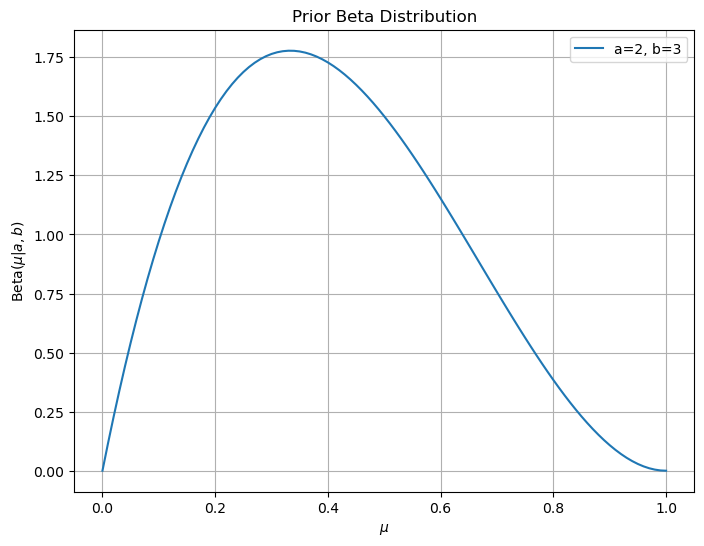

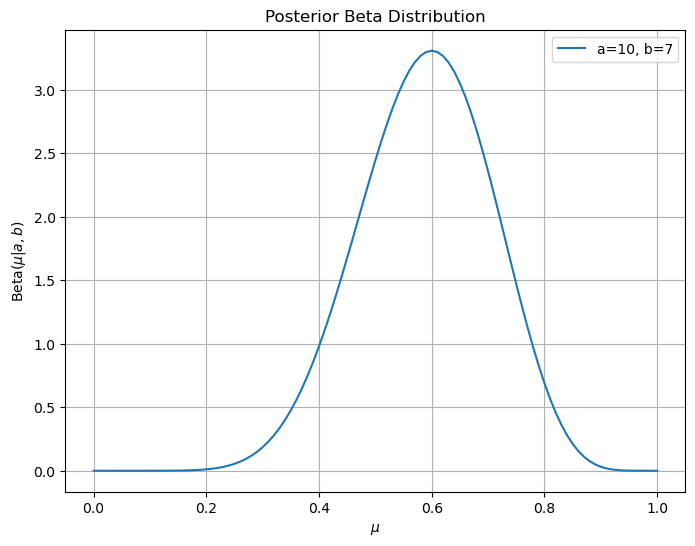

Prior Mean: 0.4, Prior Variance: 0.04
Posterior Mean: 0.5882352941176471, Posterior Variance: 0.013456362937331795


In [2]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt

# Define the Beta distribution function
def beta_distribution(mu, a, b):
    # Calculate the Beta distribution value for a given `mu`, `a`, and `b`
    from math import gamma
    normalization = gamma(a + b) / (gamma(a) * gamma(b))
    return normalization * (mu ** (a - 1)) * ((1 - mu) ** (b - 1))

# Define the function to calculate mean and variance of the Beta distribution
def beta_mean_variance(a, b):
    # Mean: E[mu] = a / (a + b)
    mean = a / (a + b)
    # Variance: Var[mu] = ab / ((a + b)^2 * (a + b + 1))
    variance = (a * b) / ((a + b) ** 2 * (a + b + 1))
    return mean, variance

# Update the Beta distribution parameters after observing data
def update_beta(a, b, m, l):
    # Observing `m` counts of x = 1 and `l` counts of x = 0 updates `a` and `b`
    a_updated = a + m
    b_updated = b + l
    return a_updated, b_updated

# Plot the Beta distribution for given values of `a` and `b`
def plot_beta(a, b, title="Beta Distribution"):
    # Generate `mu` values between 0 and 1
    mu_values = [i / 100.0 for i in range(101)]
    # Compute the Beta distribution values for each `mu`
    beta_values = [beta_distribution(mu, a, b) for mu in mu_values]
    
    # Plot the Beta distribution
    plt.figure(figsize=(8, 6))
    plt.plot(mu_values, beta_values, label=f'a={a}, b={b}')
    plt.title(title)
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'Beta$(\mu | a, b)$')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage
a, b = 2, 3  # Initial hyperparameters
m, l = 8, 4  # Observations (m for `x=1` counts, l for `x=0` counts)

# Plot prior distribution
plot_beta(a, b, title="Prior Beta Distribution")

# Update the parameters with the observed data
a_post, b_post = update_beta(a, b, m, l)

# Plot posterior distribution
plot_beta(a_post, b_post, title="Posterior Beta Distribution")

# Calculate and print mean and variance for prior and posterior
mean_prior, var_prior = beta_mean_variance(a, b)
mean_posterior, var_posterior = beta_mean_variance(a_post, b_post)

print(f"Prior Mean: {mean_prior}, Prior Variance: {var_prior}")
print(f"Posterior Mean: {mean_posterior}, Posterior Variance: {var_posterior}")


## 2. Multinomial Variables

Binary variables can be used to describe quantities that can take one of two possible values. Often, however, we encounter discrete variables that can take on one of $ K $ possible mutually exclusive states. Although there are various alternative ways to express such variables, a particularly convenient representation is the 1-of-$ K $ scheme in which the variable is represented by a $ K $-dimensional vector $ \mathbf{x} $ in which one of the elements $ x_k $ equals 1, and all remaining elements equal 0. For instance, if we have a variable that can take $ K = 6 $ states and a particular observation of the variable happens to correspond to the state where $ x_3 = 1 $, then $ \mathbf{x} $ will be represented by:

$$
\mathbf{x} = (0, 0, 1, 0, 0, 0)^T
$$

Note that such vectors satisfy:

$$
\sum_{k=1}^{K} x_k = 1
$$

If we denote the probability of $ x_k = 1 $ by the parameter $ \mu_k $, then the distribution of $ \mathbf{x} $ is given by:

$$
p(\mathbf{x}|\mu) = \prod_{k=1}^{K} \mu_k^{x_k}
$$

where $ \mu = (\mu_1, \mu_2, \dots, \mu_K) $, and the parameters $ \mu_k $ are constrained to satisfy:

$$
\mu_k \geq 0 \quad \text{and} \quad \sum_{k=1}^{K} \mu_k = 1
$$

because they represent probabilities. The distribution (2.26) can be regarded as a generalization of the Bernoulli distribution to more than two outcomes. It is easily seen that the distribution is normalized:

$$
\sum_{x} p(\mathbf{x}|\mu) = 1
$$

and the expectation is:

$$
E[\mathbf{x}|\mu] = \sum_{x} p(\mathbf{x}|\mu) \mathbf{x} = (\mu_1, \mu_2, \dots, \mu_K)^T = \mu
$$

Now consider a data set \( D \) of \( N \) independent observations \( \mathbf{x}_1, \dots, \mathbf{x}_N \). The corresponding likelihood function takes the form:

$$
p(D|\mu) = \prod_{n=1}^{N} \prod_{k=1}^{K} \mu_k^{x_{nk}}
$$

where $ m_k $ represents the number of observations of $ x_k = 1 $. These are called the sufficient statistics for this distribution, given by:

$$
m_k = \sum_{n=1}^{N} x_{nk}
$$

To find the maximum likelihood solution for $ \mu $, we need to maximize the log-likelihood:

$$
\ln p(D|\mu) = \sum_{k=1}^{K} m_k \ln \mu_k + \lambda \left( \sum_{k=1}^{K} \mu_k - 1 \right)
$$

where $ \lambda $ is a Lagrange multiplier. Setting the derivative of this with respect to $ \mu_k $ to zero gives:

$$
\mu_k = \frac{m_k}{\lambda}
$$

We solve for $ \lambda $ by substituting into the constraint $ \sum_{k=1}^{K} \mu_k = 1 $, which gives:

$$
\lambda = \frac{N}{K}
$$

Thus, the maximum likelihood estimate for $ \mu_k $ is:

$$
\mu_{ML_k} = \frac{m_k}{N}
$$

which is the fraction of the $ N $ observations for which $ x_k = 1 $.

We can also consider the joint distribution of the quantities $ m_1, m_2, \dots, m_K $, conditioned on the parameters $ \mu $ and on the total number $ N $ of observations. From (2.29), this takes the form of the multinomial distribution:

$$
\text{Mult}(m_1, m_2, \dots, m_K | \mu, N) = \prod_{k=1}^{K} \mu_k^{m_k}
$$

The normalization coefficient is the number of ways of partitioning $ N $ objects into $ K $ groups of sizes $ m_1, m_2, \dots, m_K $, given by:

$$
\frac{N!}{m_1! m_2! \dots m_K!}
$$

Note that the variables $ m_k $ are subject to the constraint:

$$
\sum_{k=1}^{K} m_k = N
$$


In [3]:
# Implementation of Multinomial Distribution and Maximum Likelihood Estimation (MLE)

# Example data: Assume we have 4 categories and N observations
N = 100  # Total number of observations
data = [
    [1, 0, 0, 0],  # Observation 1: Category 1
    [0, 1, 0, 0],  # Observation 2: Category 2
    [0, 0, 1, 0],  # Observation 3: Category 3
    [0, 0, 0, 1],  # Observation 4: Category 4
    [1, 0, 0, 0],  # Observation 5: Category 1
    # ... (100 observations in total)
]

# Function to compute the maximum likelihood estimate for multinomial probabilities
def mle_multinomial(data, K, N):
    # Initialize counts for each category (sum of occurrences of 1 in each category)
    counts = [0] * K  # K categories
    
    # Count the number of occurrences of each category
    for observation in data:
        for k in range(K):
            counts[k] += observation[k]
    
    # Compute the MLE for each category probability (mk / N)
    probabilities = [count / N for count in counts]
    
    return probabilities

# Number of categories (K)
K = 4

# Compute the MLE probabilities
mle_probabilities = mle_multinomial(data, K, N)

# Output the probabilities
print(f"Maximum Likelihood Estimation (MLE) for the category probabilities: {mle_probabilities}")


Maximum Likelihood Estimation (MLE) for the category probabilities: [0.02, 0.01, 0.01, 0.01]


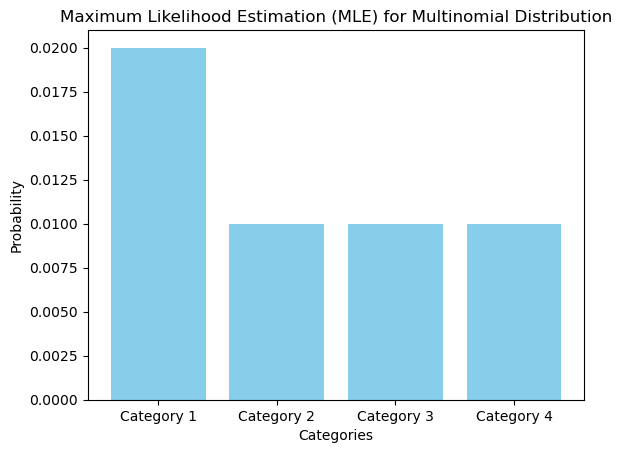

In [4]:
import matplotlib.pyplot as plt

# Example data: Assume we have 4 categories and N observations
N = 100  # Total number of observations
data = [
    [1, 0, 0, 0],  # Observation 1: Category 1
    [0, 1, 0, 0],  # Observation 2: Category 2
    [0, 0, 1, 0],  # Observation 3: Category 3
    [0, 0, 0, 1],  # Observation 4: Category 4
    [1, 0, 0, 0],  # Observation 5: Category 1
    # ... (100 observations in total)
]

# Function to compute the maximum likelihood estimate for multinomial probabilities
def mle_multinomial(data, K, N):
    # Initialize counts for each category (sum of occurrences of 1 in each category)
    counts = [0] * K  # K categories
    
    # Count the number of occurrences of each category
    for observation in data:
        for k in range(K):
            counts[k] += observation[k]
    
    # Compute the MLE for each category probability (mk / N)
    probabilities = [count / N for count in counts]
    
    return probabilities

# Number of categories (K)
K = 4

# Compute the MLE probabilities
mle_probabilities = mle_multinomial(data, K, N)

# Plotting the probabilities
categories = [f'Category {i+1}' for i in range(K)]
plt.bar(categories, mle_probabilities, color='skyblue')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Probability')
plt.title('Maximum Likelihood Estimation (MLE) for Multinomial Distribution')

# Show the plot
plt.show()


 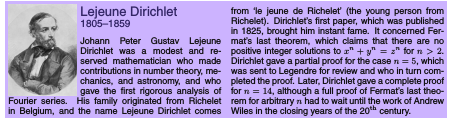

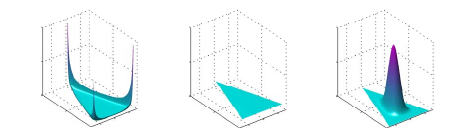

Fig.5 Plots of the Dirichlet distribution over three variables, where the two horizontal axes are coordinates in the plane of the simplex and the vertical axis corresponds to the value of the density. Here {αk } = 0.1 on the left plot, {αk } = 1 in the centre plot, and {αk } = 10 in the right plot.

## 4. The Dirichlet Distribution

We now introduce a family of prior distributions for the parameters $ \{ \mu_k \} $ of the multinomial distribution (2.34). By inspection of the form of the multinomial distribution, we see that the conjugate prior is given by:

$$
p(\mu | \alpha) \propto \prod_{k=1}^{K} \mu_k^{\alpha_k - 1}
$$

where $ 0 \leq \mu_k \leq 1 $ and $ \sum_{k=1}^{K} \mu_k = 1 $. Here, $ \alpha_1, \dots, \alpha_K $ are the parameters of the distribution, and $ \alpha = (\alpha_1, \dots, \alpha_K)^T $.

Note that because of the summation constraint, the distribution over the space of $ \{\mu_k\} $ is confined to a simplex of dimensionality $ K - 1 $, as illustrated for $ K = 3 $ in Fig.4.



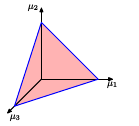

Fig.4 The Dirichlet distribution over three variables $µ_1$ , $µ_2$ , $µ_3$ is conﬁned to a simplex (a bounded linear manifold) of the form shown as a consequence of the constraints.
$$
\mu_1 + \mu_2 + \mu_3 = 1, \quad 0 \leq \mu_k \leq 1 \quad \text{for} \quad k = 1, 2, 3.
$$


The normalized form for this distribution is given by:

$$
\text{Dir}(\mu | \alpha) = \frac{\Gamma(\alpha_0)}{\prod_{k=1}^{K} \Gamma(\alpha_k)} \prod_{k=1}^{K} \mu_k^{\alpha_k - 1}
$$

where $ \alpha_0 = \sum_{k=1}^{K} \alpha_k $ and $ \Gamma(x) $ is the gamma function. 

### Posterior Distribution

Multiplying the prior (2.38) by the likelihood function (2.34), we obtain the posterior distribution for the parameters $ \{\mu_k\} $ in the form:

$$
p(\mu | D, \alpha) \propto p(D | \mu) p(\mu | \alpha) \propto \prod_{k=1}^{K} \mu_k^{\alpha_k + m_k - 1}
$$

Thus, the posterior distribution also takes the form of a Dirichlet distribution:

$$
p(\mu | D, \alpha) = \text{Dir}(\mu | \alpha + m)
$$

where $ m = (m_1, \dots, m_K)^T $, and $ m_k $ represents the number of observations of $ x_k = 1 $.

### Interpretation of the Parameters

We can interpret the parameters $ \alpha_k $ of the Dirichlet prior as an effective number of observations of $ x_k = 1 $. This interpretation is similar to the case of the binomial distribution with the beta prior.

### Plots of the Dirichlet Distribution

The Dirichlet distribution over three variables $ \mu_1, \mu_2, \mu_3 $ is confined to a simplex, which is a bounded linear manifold. A plot of the Dirichlet distribution with different values of $ \alpha_k $ is shown in Figure 2.5.

- For $ \alpha_k = 0.1 $ on the left plot, the distribution is highly dispersed.
- For $ \alpha_k = 1 $ in the center plot, the distribution is more uniform.
- For $ \alpha_k = 10 $ on the right plot, the distribution is sharply peaked around certain values.


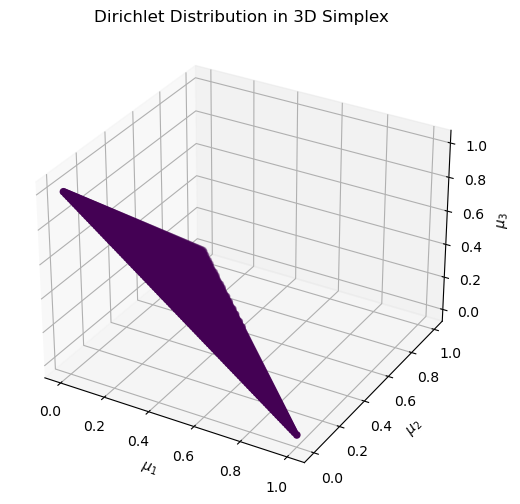

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

# Function to plot the Dirichlet distribution over a 3-dimensional simplex
def plot_dirichlet(alpha):
    # Create a grid of points in 2D space (since the simplex is 2D)
    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)
    
    # Create a meshgrid of all (x, y) pairs
    X, Y = np.meshgrid(x, y)
    Z = 1 - X - Y  # Ensure that x + y + z = 1 (simplicial constraint)
    
    # Mask to ensure points lie within the triangle (simplex)
    mask = Z >= 0
    X = X[mask]
    Y = Y[mask]
    Z = Z[mask]
    
    # Stack the points into a (n, 3) array for evaluation
    points = np.vstack([X, Y, Z]).T
    
    # Evaluate the Dirichlet distribution over the points
    pdf_values = dirichlet.pdf(points.T, alpha)
    
    # Create a scatter plot of the points in the simplex
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X, Y, Z, c=pdf_values, cmap='viridis', marker='o')
    
    # Labels and title
    ax.set_xlabel(r'$\mu_1$')
    ax.set_ylabel(r'$\mu_2$')
    ax.set_zlabel(r'$\mu_3$')
    ax.set_title('Dirichlet Distribution in 3D Simplex')
    
    plt.show()

# Set the alpha parameters (Dirichlet hyperparameters)
alpha = [1.0, 1.0, 1.0]  # This is the uniform case (symmetric Dirichlet)

# Plot the Dirichlet distribution
plot_dirichlet(alpha)


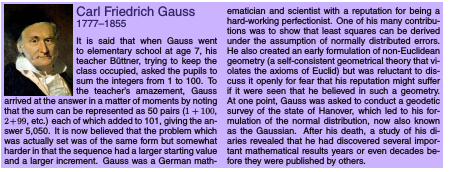



## 3. The Gaussian Distribution

The **Gaussian distribution**, also known as the normal distribution, is a widely used model for continuous variables. For a single variable \( x \), the Gaussian distribution can be written as:

$$
N(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( - \frac{(x - \mu)^2}{2\sigma^2} \right)
$$

where $ \mu $ is the mean and $ \sigma^2 $ is the variance.

For a $ D $-dimensional vector $ x $, the **multivariate Gaussian distribution** takes the form:

$$
N(x | \mu, \Sigma) = \frac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( - \frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)
$$

where $ \mu $ is a $ D $-dimensional mean vector, $ \Sigma $ is a $ D \times D $ covariance matrix, and $ |\Sigma| $ denotes the determinant of $ \Sigma $.

### Geometric Interpretation

The functional dependence of the Gaussian on $ x $ is through the quadratic form:

$$
\Delta^2 = (x - \mu)^T \Sigma^{-1} (x - \mu)
$$

which appears in the exponent. The quantity $ \Delta $ is called the **Mahalanobis distance** from $ \mu $ to $ x $. This distance reduces to the Euclidean distance when $ \Sigma $ is the identity matrix. The Gaussian distribution will be constant on surfaces in $ x $-space for which this quadratic form is constant.

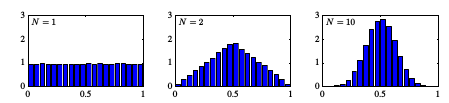

Fig.6 Histogram plots of the mean of N uniformly distributed numbers for various values of N . We observe that as N increases, the distribution tends towards a Gaussian.

### Eigenvalue Decomposition of Covariance Matrix

The covariance matrix $ \Sigma $ can be diagonalized using its eigenvectors. The eigenvector equation for $ \Sigma $ is:

$$
\Sigma u_i = \lambda_i u_i
$$

where $ u_i $ are the eigenvectors and $ \lambda_i $ are the corresponding eigenvalues.

The covariance matrix $ \Sigma $ can be expressed as:

$$
\Sigma = \sum_{i=1}^D \lambda_i u_i u_i^T
$$

Similarly, the inverse covariance matrix $ \Sigma^{-1} $ is:

$$
\Sigma^{-1} = \sum_{i=1}^D \frac{1}{\lambda_i} u_i u_i^T
$$

### Transforming to New Coordinates

The new coordinates $ y = (y_1, y_2, \dots, y_D)^T $ are given by the transformation:

$$
y_i = u_i^T (x - \mu)
$$

The Mahalanobis distance in these new coordinates becomes:

$$
\Delta^2 = \sum_{i=1}^D \frac{y_i^2}{\lambda_i}
$$

### Probability Density Contours

The probability density contours of a Gaussian distribution form ellipsoids, with their axes oriented along the eigenvectors $ u_i $ of the covariance matrix and their scaling factors given by the eigenvalues $ \lambda_i $.

For a two-dimensional Gaussian, the contours of constant probability density are ellipses, as shown below:

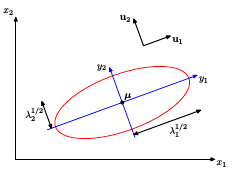

Fig.7 The red curve shows the ellip- tical surface of constant probability density for a Gaussian in a two-dimensional space x = (x1 , x2 ) on which the density is $\exp(−1/2)$ of its value at x = µ. The major axes of the ellipse are deﬁned by the eigenvectors ui of the covari- ance matrix, with correspond- ing eigenvalues λi 

where the axes of the ellipse are given by the eigenvectors, and the scaling along these axes is determined by the eigenvalues.

### Conditions for Positive Definiteness

For the Gaussian distribution to be well-defined, the covariance matrix $ \Sigma $ must be **positive definite**, meaning that all eigenvalues $ \lambda_i $ are strictly positive. If any eigenvalue is zero, the distribution is singular and confined to a subspace of lower dimensionality.

### Jacobian and Determinant of Covariance Matrix

In the new coordinate system, the Jacobian matrix $ J $ is given by:

$$
J_{ij} = \frac{\partial x_i}{\partial y_j} = U_{ji}
$$

where $ U $ is the matrix whose rows are the eigenvectors of $ \Sigma $. Since $ U $ is an orthogonal matrix, we have:

$$
|J| = 1
$$

The determinant of the covariance matrix is:

$$
|\Sigma| = \prod_{i=1}^D \lambda_i
$$

### 2.3. The Gaussian Distribution

The Gaussian, also known as the normal distribution, is a widely used model for the distribution of continuous variables. In the case of a single variable $ x $, the Gaussian distribution can be written as:

$$
N(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left( - \frac{(x - \mu)^2}{2 \sigma^2} \right)
$$

where $ \mu $ is the mean and $ \sigma^2 $ is the variance. For a $ D $-dimensional vector $ x $, the multivariate Gaussian distribution takes the form:

$$
N(x | \mu, \Sigma) = \frac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} \exp \left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)
$$

where $ \mu $ is a $ D $-dimensional mean vector, $ \Sigma $ is a $ D \times D $ covariance matrix, and $ |\Sigma| $ denotes the determinant of $ \Sigma $.

The Gaussian distribution arises in many different contexts and can be motivated from a variety of different perspectives. For example, we have already seen that for a single real variable, the distribution that maximizes the entropy is the Gaussian. This property applies also to the multivariate Gaussian. Another situation in which the Gaussian distribution arises is when we consider the sum of multiple random variables. The central limit theorem (due to Laplace) tells us that, subject to certain mild conditions, the sum of a set of random variables has a distribution that becomes increasingly Gaussian as the number of terms in the sum increases.

For large $ N $, the distribution of the mean of $ N $ uniformly distributed random variables tends to a Gaussian, as illustrated in the figure below.

#### Figure 2.6: Histogram plots of the mean of $ N $ uniformly distributed numbers for various values of $ N $. We observe that as $ N $ increases, the distribution tends towards a Gaussian.

The Gaussian distribution has many important analytical properties. As a result, this section will be more technically involved than some of the earlier sections, and will require familiarity with various matrix identities. We encourage the reader to become proficient in manipulating Gaussian distributions using the techniques presented here as this will be invaluable in understanding more complex models.

The functional dependence of the Gaussian on $ x $ is through the quadratic form:

$$
\Delta^2 = (x - \mu)^T \Sigma^{-1} (x - \mu)
$$

which appears in the exponent. The quantity $ \Delta $ is called the Mahalanobis distance from $ \mu $ to $ x $, and it reduces to the Euclidean distance when $ \Sigma $ is the identity matrix. The Gaussian distribution will be constant on surfaces in $ x $-space for which this quadratic form is constant.

Next, consider the eigenvector equation for the covariance matrix $ \Sigma $:

$$
\Sigma u_i = \lambda_i u_i
$$

where $ i = 1, \dots, D $. Because $ \Sigma $ is a real, symmetric matrix, its eigenvalues will be real, and its eigenvectors can be chosen to form an orthonormal set:

$$
u_i^T u_j = \delta_{ij}
$$

The covariance matrix $ \Sigma $ can be expressed as an expansion in terms of its eigenvectors:

$$
\Sigma = \sum_{i=1}^{D} \lambda_i u_i u_i^T
$$

and similarly, the inverse covariance matrix $ \Sigma^{-1} $ is:

$$
\Sigma^{-1} = \sum_{i=1}^{D} \frac{1}{\lambda_i} u_i u_i^T
$$

Substituting this into the quadratic form, we get:

$$
\Delta^2 = \sum_{i=1}^{D} \frac{y_i^2}{\lambda_i}
$$

where we have defined $ y_i = u_i^T (x - \mu) $. The Gaussian distribution in the new coordinate system is:

$$
p(y) = \prod_{j=1}^{D} \frac{1}{\sqrt{2\pi \lambda_j}} \exp \left( -\frac{y_j^2}{2 \lambda_j} \right)
$$

which is the product of $ D $ independent univariate Gaussian distributions.

The expectation of $ x $ under the Gaussian distribution is:

$$
E[x] = \mu
$$

For the second-order moments, the covariance of $ x $ is given by:

$$
\text{cov}[x] = E[(x - E[x])(x - E[x])^T] = \Sigma
$$

Thus, the parameter matrix $ \Sigma $ governs the covariance of $ x $ under the Gaussian distribution.

While the Gaussian distribution is widely used as a density model, it has limitations due to the number of free parameters in the distribution. A general symmetric covariance matrix $ \Sigma $ has $ \frac{D(D+1)}{2} $ independent parameters, and there are another $ D $ independent parameters in $ \mu $, giving a total of $ \frac{D(D+3)}{2} $ parameters. For large $ D $, this total number of parameters leads to the development of more complex probabilistic graphical models.


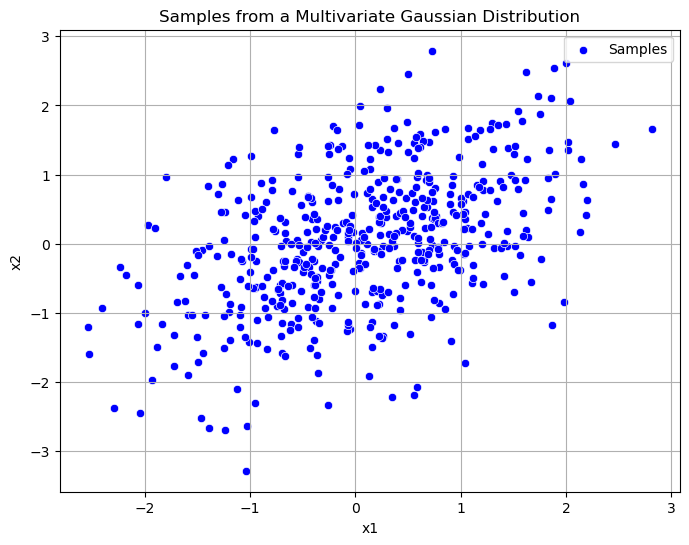

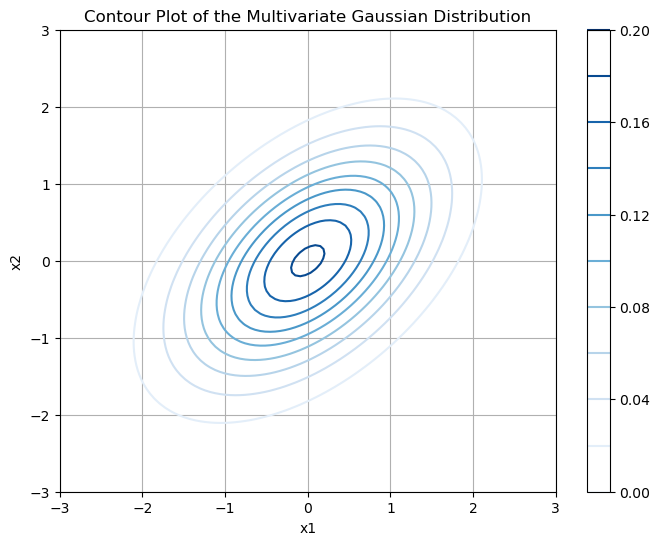

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the random seed for reproducibility
np.random.seed(0)

# Define the parameters for the Gaussian distribution
D = 2  # Dimension of the distribution
mu = np.array([0, 0])  # Mean of the distribution
Sigma = np.array([[1, 0.5], [0.5, 1]])  # Covariance matrix

# Generate random samples from the multivariate Gaussian distribution
samples = np.random.multivariate_normal(mu, Sigma, size=500)

# Plotting the samples
plt.figure(figsize=(8, 6))
sns.scatterplot(x=samples[:, 0], y=samples[:, 1], color='blue', label="Samples")
plt.title("Samples from a Multivariate Gaussian Distribution")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.legend()
plt.show()

# Define a function to evaluate the multivariate Gaussian PDF
def multivariate_gaussian(x, mu, Sigma):
    D = len(mu)
    x_mu = x - mu
    inv_Sigma = np.linalg.inv(Sigma)
    det_Sigma = np.linalg.det(Sigma)
    exponent = -0.5 * np.dot(np.dot(x_mu.T, inv_Sigma), x_mu)
    normalization = 1 / (np.sqrt((2 * np.pi) ** D * det_Sigma))
    return normalization * np.exp(exponent)

# Visualizing the Gaussian distribution's contour
x1_vals = np.linspace(-3, 3, 100)
x2_vals = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = np.zeros(X1.shape)

# Evaluate the Gaussian PDF over the grid
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z[i, j] = multivariate_gaussian(np.array([X1[i, j], X2[i, j]]), mu, Sigma)

# Plot the contour
plt.figure(figsize=(8, 6))
cp = plt.contour(X1, X2, Z, 10, cmap='Blues')
plt.colorbar(cp)
plt.title("Contour Plot of the Multivariate Gaussian Distribution")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


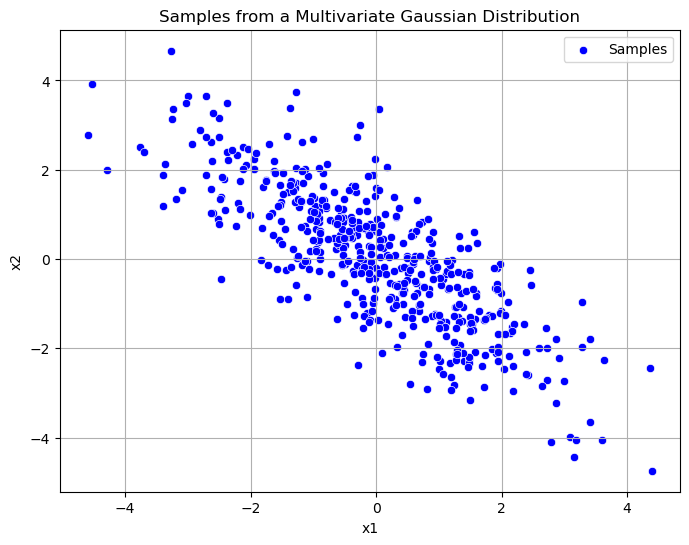

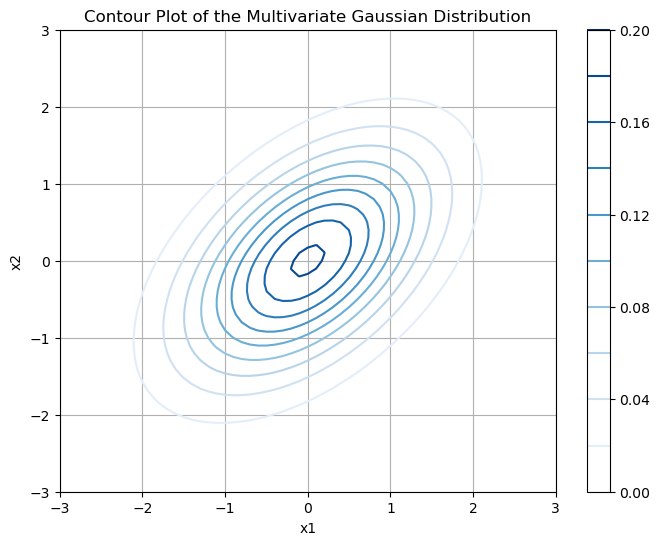

In [7]:
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate the inverse of a 2x2 matrix
def inverse_matrix(matrix):
    det = matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    if det == 0:
        raise ValueError("Matrix is singular and cannot be inverted")
    inv = [[matrix[1][1] / det, -matrix[0][1] / det],
           [-matrix[1][0] / det, matrix[0][0] / det]]
    return inv

# Function to multiply a 2x2 matrix and a vector
def matrix_vector_mult(matrix, vector):
    return [matrix[0][0] * vector[0] + matrix[0][1] * vector[1],
            matrix[1][0] * vector[0] + matrix[1][1] * vector[1]]

# Function to calculate the determinant of a 2x2 matrix
def determinant(matrix):
    return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

# Function to generate random samples from the multivariate Gaussian
def generate_multivariate_gaussian(mu, Sigma, size=500):
    samples = []
    for _ in range(size):
        # Generate samples from a standard normal distribution
        x1 = random.gauss(0, 1)
        x2 = random.gauss(0, 1)
        
        # Apply the transformation
        # Sigma is the covariance matrix, and mu is the mean
        L = [[Sigma[0][0], Sigma[0][1]], [Sigma[1][0], Sigma[1][1]]]
        inv_L = inverse_matrix(L)
        
        # Linear transformation
        transformed = matrix_vector_mult(inv_L, [x1, x2])
        sample = [mu[0] + transformed[0], mu[1] + transformed[1]]
        
        samples.append(sample)
    return samples

# Define parameters for the multivariate Gaussian distribution
mu = [0, 0]  # Mean vector
Sigma = [[1, 0.5], [0.5, 1]]  # Covariance matrix

# Generate 500 samples from the distribution
samples = generate_multivariate_gaussian(mu, Sigma, size=500)

# Convert to list of x1 and x2 components
x1_vals, x2_vals = zip(*samples)

# Plot the scatter plot of the samples
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x1_vals, y=x2_vals, color='blue', label="Samples")
plt.title("Samples from a Multivariate Gaussian Distribution")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.legend()
plt.show()

# Function to evaluate the multivariate Gaussian PDF
def multivariate_gaussian(x, mu, Sigma):
    D = len(mu)
    x_mu = [x[i] - mu[i] for i in range(D)]
    
    # Compute the inverse covariance matrix
    inv_Sigma = inverse_matrix(Sigma)
    
    # Compute the exponent part
    exponent = -0.5 * sum(x_mu[i] * matrix_vector_mult(inv_Sigma, x_mu)[i] for i in range(D))
    
    # Compute the normalization factor
    det_Sigma = determinant(Sigma)
    normalization = 1 / (math.sqrt((2 * math.pi) ** D * det_Sigma))
    
    # Return the probability density
    return normalization * math.exp(exponent)

# Visualizing the Gaussian distribution's contour
x1_vals = [-3 + i * 0.1 for i in range(61)]
x2_vals = [-3 + i * 0.1 for i in range(61)]
Z = [[0 for _ in range(len(x2_vals))] for _ in range(len(x1_vals))]

# Evaluate the Gaussian PDF over the grid
for i, x1 in enumerate(x1_vals):
    for j, x2 in enumerate(x2_vals):
        Z[i][j] = multivariate_gaussian([x1, x2], mu, Sigma)

# Plot the contour
plt.figure(figsize=(8, 6))
cp = plt.contour(x1_vals, x2_vals, Z, 10, cmap='Blues')
plt.colorbar(cp)
plt.title("Contour Plot of the Multivariate Gaussian Distribution")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


### 1. Conditional Gaussian Distributions

An important property of the multivariate Gaussian distribution is that if two sets of variables are jointly Gaussian, then the conditional distribution of one set conditioned on the other is again Gaussian. Similarly, the marginal distribution of either set is also Gaussian. 

Consider first the case of conditional distributions. Suppose $ x $ is a $ D $-dimensional vector with a Gaussian distribution $ N(x|\mu, \Sigma) $ and that we partition $ x $ into two disjoint subsets $ x_a $ and $ x_b $. Without loss of generality, we can take $ x_a $ to form the first $ M $ components of $ x $, with $ x_b $ comprising the remaining $ D - M $ components. So that,

$$
x = \begin{bmatrix}
x_a \\
x_b
\end{bmatrix}
$$

We also define corresponding partitions of the mean vector $ \mu $ given by:

$$
\mu = \begin{bmatrix}
\mu_a \\
\mu_b
\end{bmatrix}
$$

and of the covariance matrix $ \Sigma $ given by:

$$
\Sigma = \begin{bmatrix}
\Sigma_{aa} & \Sigma_{ab} \\
\Sigma_{ba} & \Sigma_{bb}
\end{bmatrix}
$$

Note that the symmetry $ \Sigma^T = \Sigma $ of the covariance matrix implies that $ \Sigma_{aa} $ and $ \Sigma_{bb} $ are symmetric, while $ \Sigma_{ba} = \Sigma_{ab}^T $.

In many situations, it will be convenient to work with the inverse of the covariance matrix $ \Lambda \equiv \Sigma^{-1} $, which is known as the precision matrix. We can also introduce the partitioned form of the precision matrix:

$$
\Lambda = \begin{bmatrix}
\Lambda_{aa} & \Lambda_{ab} \\
\Lambda_{ba} & \Lambda_{bb}
\end{bmatrix}
$$

Since the inverse of a symmetric matrix is also symmetric, we see that $ \Lambda_{aa} $ and $ \Lambda_{bb} $ are symmetric, while $ \Lambda_{ab}^T = \Lambda_{ba} $.

Let us now find an expression for the conditional distribution $ p(x_a | x_b) $. From the product rule of probability, we see that this conditional distribution can be evaluated from the joint distribution $ p(x) = p(x_a, x_b) $ by fixing $ x_b $ to the observed value and normalizing the resulting expression to obtain a valid probability distribution over $ x_a $. 

Instead of performing this normalization explicitly, we can obtain the solution more efficiently by considering the quadratic form in the exponent of the Gaussian distribution given by:

$$
-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) = -\frac{1}{2} \left[ (x_a - \mu_a)^T \Lambda_{aa} (x_a - \mu_a) + (x_a - \mu_a)^T \Lambda_{ab} (x_b - \mu_b) + (x_b - \mu_b)^T \Lambda_{ba} (x_a - \mu_a) + (x_b - \mu_b)^T \Lambda_{bb} (x_b - \mu_b) \right]
$$

We see that as a function of $ x_a $, this is again a quadratic form, and hence the corresponding conditional distribution $ p(x_a | x_b) $ will be Gaussian. The distribution is completely characterized by its mean and covariance, which we aim to identify by inspection of the quadratic form.

We can apply the technique of 'completing the square', which is often used in Gaussian distributions. The exponent in a general Gaussian distribution $ N(x|\mu, \Sigma) $ can be written as:

$$
-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) = -\frac{1}{2} \left( x^T \Sigma^{-1} x - 2 \mu^T \Sigma^{-1} x + \mu^T \Sigma^{-1} \mu \right)
$$

From this, we can equate the matrix of coefficients entering the second order term in $ x $ to the inverse covariance matrix $ \Sigma^{-1} $ and the coefficient of the linear term in $ x $ to $ \Sigma^{-1} \mu $, from which we can determine $ \mu $.

Now let us apply this procedure to the conditional Gaussian distribution $ p(x_a | x_b) $, where the quadratic form in the exponent is given by:

$$
-\frac{1}{2} \left( x_a - \mu_a \right)^T \Lambda_{aa} \left( x_a - \mu_a \right)
$$

From this, we can immediately conclude that the covariance (inverse precision) of $ p(x_a | x_b) $ is given by:

$$
\Sigma_{a|b} = \Lambda_{aa}^{-1}
$$

Thus, the conditional mean of $ x_a $ given $ x_b $ is:

$$
\mu_{a|b} = \mu_a + \Lambda_{ab} \Lambda_{bb}^{-1} (x_b - \mu_b)
$$

Where:

- $ \mu_{a|b} $ is the conditional mean of $ x_a $ given $ x_b $,
- $ \Sigma_{a|b} $ is the conditional covariance of $ x_a $ given $ x_b $.

This result shows that the conditional distribution $ p(x_a | x_b) $ is Gaussian with mean $ \mu_{a|b} $ and covariance $ \Sigma_{a|b} $.


In [9]:
# Function to compute the inverse of a matrix (using Gauss-Jordan elimination)
def invert_matrix(matrix):
    n = len(matrix)
    # Creating the augmented matrix [matrix | identity matrix]
    augmented = [row[:] + [1 if i == j else 0 for j in range(n)] for i, row in enumerate(matrix)]
    
    # Applying Gauss-Jordan elimination
    for i in range(n):
        # Make the diagonal element 1
        pivot = augmented[i][i]
        for j in range(2 * n):
            augmented[i][j] /= pivot
        
        # Make all other elements in column i zero
        for j in range(n):
            if j != i:
                ratio = augmented[j][i]
                for k in range(2 * n):
                    augmented[j][k] -= ratio * augmented[i][k]
    
    # Extract the inverse matrix
    inverse_matrix = [row[n:] for row in augmented]
    return inverse_matrix

# Function to compute the conditional mean and covariance
def conditional_gaussian(xa, xb, mu_a, mu_b, Sigma_aa, Sigma_ab, Sigma_ba, Sigma_bb):
    # Step 1: Compute the precision matrix (inverse covariance matrix)
    Lambda_aa = invert_matrix(Sigma_aa)
    Lambda_bb = invert_matrix(Sigma_bb)
    
    # Step 2: Compute the conditional covariance (inverse precision)
    Sigma_a_b_inv = invert_matrix(Lambda_aa)
    
    # Step 3: Compute the conditional mean
    # Compute xb difference from mu_b
    xb_diff = [xb[i] - mu_b[i] for i in range(len(xb))]
    
    # Matrix multiplication Lambda_ab * xb_diff
    Lambda_ab_xb = [sum(Sigma_ab[i][j] * xb_diff[j] for j in range(len(xb))) for i in range(len(Sigma_ab))]
    
    # Add the result to mu_a to get the conditional mean for xa given xb
    mu_a_b = [mu_a[i] + Lambda_ab_xb[i] for i in range(len(mu_a))]
    
    return mu_a_b, Sigma_a_b_inv

# Example input data (mean, covariance matrix, and partitioned variables)
mu_a = [1, 2]
mu_b = [3, 4]

Sigma_aa = [[1, 0.5], [0.5, 1]]
Sigma_ab = [[0.5, 0.2], [0.2, 0.5]]
Sigma_ba = [[0.5, 0.2], [0.2, 0.5]]
Sigma_bb = [[1, 0.3], [0.3, 1]]

xa = [1.0, 1.0]  # example observed variable for xa
xb = [2.0, 3.0]  # example observed variable for xb

# Get the conditional distribution for xa given xb
mu_a_b, Sigma_a_b_inv = conditional_gaussian(xa, xb, mu_a, mu_b, Sigma_aa, Sigma_ab, Sigma_ba, Sigma_bb)

# Print the results
print("Conditional Mean of xa given xb:", mu_a_b)
print("Conditional Covariance of xa given xb:", Sigma_a_b_inv)


Conditional Mean of xa given xb: [0.30000000000000004, 1.3]
Conditional Covariance of xa given xb: [[1.0, 0.5], [0.5, 1.0]]


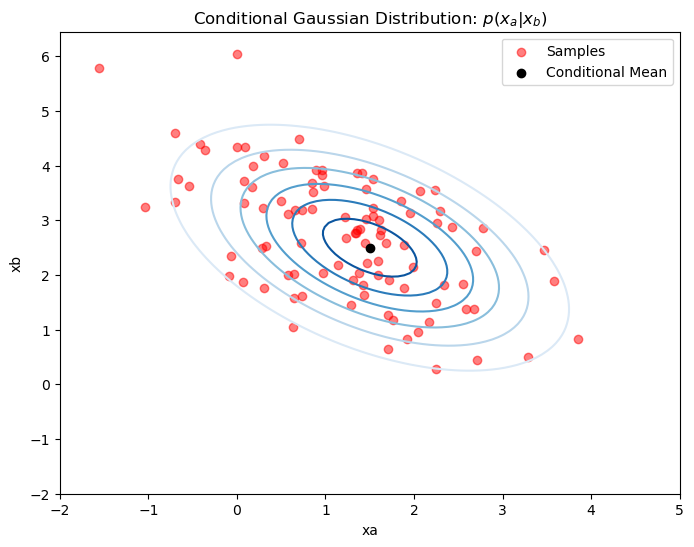

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to sample from the conditional Gaussian distribution
def sample_conditional(mu_a_b, Sigma_a_b_inv, num_samples=100):
    # Compute the covariance matrix from the inverse precision matrix
    Sigma_a_b = invert_matrix(Sigma_a_b_inv)
    
    # Generate samples from the conditional distribution
    samples = []
    for _ in range(num_samples):
        sample = np.random.multivariate_normal(mu_a_b, Sigma_a_b)
        samples.append(sample)
    
    return np.array(samples)

# Plot the conditional distribution
def plot_conditional_distribution(xa_range, xb_range, mu_a_b, Sigma_a_b_inv, num_samples=100):
    # Generate conditional samples
    samples = sample_conditional(mu_a_b, Sigma_a_b_inv, num_samples)
    
    # Create a grid of points to plot the Gaussian contours
    X, Y = np.meshgrid(xa_range, xb_range)
    Z = np.array([[np.exp(-0.5 * np.dot(np.dot(np.array([x, y]) - mu_a_b, Sigma_a_b_inv), np.array([x, y]) - mu_a_b)) 
                   for x, y in zip(X_row, Y_row)] for X_row, Y_row in zip(X, Y)])
    
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, cmap="Blues")
    plt.scatter(samples[:, 0], samples[:, 1], color='red', label='Samples', alpha=0.5)
    plt.scatter(mu_a_b[0], mu_a_b[1], color='black', label='Conditional Mean', zorder=10)
    plt.title("Conditional Gaussian Distribution: $p(x_a | x_b)$")
    plt.xlabel("xa")
    plt.ylabel("xb")
    plt.legend()
    plt.show()

# Example input (using previously computed mu_a_b, Sigma_a_b_inv)
mu_a_b = [1.5, 2.5]  # Example conditional mean (replace with actual result)
Sigma_a_b_inv = [[1.0, 0.5], [0.5, 1.0]]  # Example conditional covariance inverse (replace with actual result)

# Define ranges for xa and xb for the grid
xa_range = np.linspace(-2, 5, 100)
xb_range = np.linspace(-2, 5, 100)

# Plot the conditional distribution
plot_conditional_distribution(xa_range, xb_range, mu_a_b, Sigma_a_b_inv)
